In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


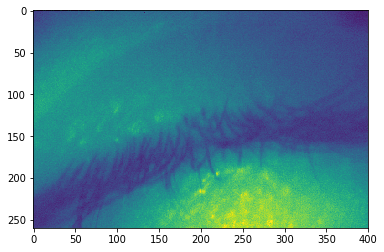

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('dataClosedEye/closedEye2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [3]:
img.shape

(260, 400)

In [25]:
# Read all data
allDataX = np.zeros((826,260,400))
allDataY = np.zeros(826)

for i in range(346):
    filename = 'dataClosedEye/closedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)

    allDataX[i] = img
    allDataY[i] = 0

    
for i in range(480):
    filename = 'dataOpenedEye/openedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    allDataX[i+346] = img
    allDataY[i+346] = 1


In [5]:
allDataX.shape

(826, 260, 400)

In [571]:
allDataX = reshape(allDataX, (allDataX.shape[0], allDataX.shape[1], allDataX.shape[2], 1))

In [35]:
allDataX.shape

(826, 260, 400, 1)

In [36]:
allDataY[300]

0.0

In [51]:
Xtrain, Ytrain = shuffle(allDataX, allDataY, random_state=0)
Xvalid = Xtrain[700:]
Xtrain = Xtrain[:700]
Yvalid = Ytrain[700:]
Ytrain = Ytrain[:700]

In [52]:
def model(Xshape):
    
    mod = Sequential()
    mod.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer='glorot_normal', input_shape=Xshape))
    mod.add(MaxPooling2D(pool_size=(4, 4)))
    
    mod.add(Conv2D(8, (5, 5), activation='relu', kernel_initializer='glorot_normal'))
    mod.add(MaxPooling2D(pool_size=(4, 4)))

    mod.add(Flatten())
#    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.01)))
    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0)))
#    mod.add(Dense(256, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0)))
    mod.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [53]:
mymodel = model(Xtrain.shape[1:])
opt = optimizers.Adam(lr=0.0001)#, decay=0.0001)


mymodel.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [54]:
# First train with small mini batch size and default learning rate
mymodel.fit(Xtrain, Ytrain, epochs = 10, batch_size=32)
# Then train with smaller learning rate and larger batch size
#K.set_value(mymodel.optimizer.lr, 0.001)
#mymodel.fit(xtrain, ylabels, epochs = 10, batch_size=512)
#K.set_value(mymodel.optimizer.lr, 0.0001)
#mymodel.fit(xtrain, ylabels, epochs = 10, batch_size=1024)



Epoch 1/10
700/700 [==============================] - 16s 23ms/step - loss: 1.8180 - acc: 0.5929
Epoch 2/10
700/700 [==============================] - 16s 22ms/step - loss: 0.3611 - acc: 0.8529
Epoch 3/10
700/700 [==============================] - 15s 22ms/step - loss: 0.1709 - acc: 0.9386
Epoch 4/10
700/700 [==============================] - 16s 22ms/step - loss: 0.1094 - acc: 0.9700
Epoch 5/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0664 - acc: 0.9829
Epoch 6/10
700/700 [==============================] - 15s 22ms/step - loss: 0.0432 - acc: 0.9943
Epoch 7/10
700/700 [==============================] - 15s 22ms/step - loss: 0.0282 - acc: 0.9971
Epoch 8/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0191 - acc: 0.9971
Epoch 9/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0147 - acc: 1.0000
Epoch 10/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0096 - acc: 1.0000


In [56]:
pred = mymodel.evaluate(x = Xvalid, y = Yvalid)
### END CODE HERE ###
print()
print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

126/126 [==============================] - 1s 11ms/step

Loss = 0.08613264194083592
Test Accuracy = 0.9761904695677379


In [58]:
validPred = mymodel.predict(Xvalid)

In [60]:
np.where(validPred > 0.5) 

(array([  2,   3,   6,   8,  10,  12,  14,  15,  16,  17,  18,  20,  21,
         22,  23,  25,  26,  27,  30,  31,  33,  35,  36,  37,  39,  42,
         43,  48,  49,  50,  51,  54,  60,  61,  63,  64,  67,  68,  69,
         71,  75,  76,  77,  80,  81,  82,  83,  84,  87,  89,  90,  93,
         94,  95,  96,  98, 100, 101, 102, 104, 105, 106, 107, 109, 110,
        111, 113, 114, 115, 117, 119, 120, 121, 123, 124, 125], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [61]:
np.where(Yvalid == 1)

(array([  2,   3,   6,   8,  10,  12,  14,  15,  16,  17,  18,  20,  21,
         22,  23,  25,  27,  30,  31,  33,  35,  36,  37,  39,  43,  48,
         49,  50,  51,  54,  60,  61,  63,  64,  67,  68,  69,  71,  75,
         76,  77,  80,  81,  82,  83,  84,  87,  89,  90,  93,  94,  95,
         96,  98, 100, 101, 102, 105, 106, 107, 109, 110, 111, 113, 114,
        115, 117, 119, 120, 121, 123, 124, 125], dtype=int64),)

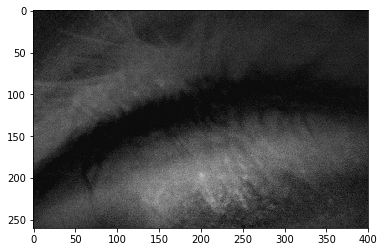

In [73]:
missed = np.reshape(Xvalid[26], (260,400))
plt.imshow(missed, cmap='gray')
plt.show()

In [394]:
# Read all data
dataOpened = np.zeros((216,260,400))

for i in range(216):
    filename = 'dataAli/aliEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    dataOpened[i] = img


<IPython.core.display.Javascript object>


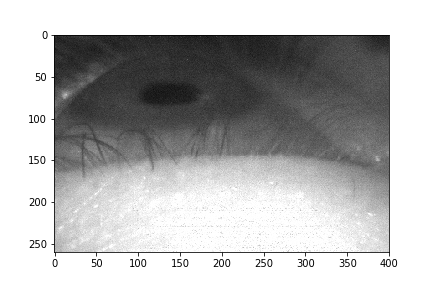

In [416]:
%matplotlib notebook
plt.imshow(dataOpened[215], cmap='gray')
plt.show()